## **Parte 1: Definição do projeto e coleta de dados**

**Objetivo do projeto**

Analisar dados de um e-commerce para entender o comportamento dos clientes, identificar padrões de compra e gerar insights estratégicos.

### 📌 Passo 1.1 – Escolha do dataset

Vamos usar o dataset Brazilian E-Commerce Public Dataset by Olist, disponível no [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

### 📌 Passo 1.2 – Seleção dos arquivos principais

Esse dataset é composto por vários arquivos. Nesta análise, os arquivos que utilizaremos são:
* 📂 olist_orders_dataset.csv → Pedidos dos clientes
* 📂 olist_order_items_dataset.csv → Itens comprados em cada pedido
* 📂 olist_products_dataset.csv → Informações dos produtos
* 📂 olist_customers_dataset.csv → Dados dos clientes

### 📌 Passo 1.3 – Carregar as bibliotecas necessárias


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Parte 2: Análise e cruzamento dos dados**

### 📌 Passo 2.1 – Carregar e inspecionar os dados brutos

Utilizamos a biblioteca *Pandas* para carregar os datasets:

In [107]:
# Carregar datasets
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

print('Colunas de orders: \n', orders.columns)
print('Colunas de order_items: \n', order_items.columns)
print('Colunas de products: \n', products.columns)
print('Colunas de customers: \n', customers.columns)

Colunas de orders: 
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Colunas de order_items: 
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Colunas de products: 
 Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Colunas de customers: 
 Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


### 📌 Passo 2.2 – Seleção das colunas essenciais

Os datasets possuem muitas colunas, mas para nossa análise de comportamento do consumidor, vamos focar nestas principais:

✅ Pedidos (orders)
   * order_id → ID do pedido
   * customer_id → Relaciona o pedido ao cliente
   * order_status → Status do pedido
   * order_purchase_timestamp → Data da compra
   * order_delivered_customer_date → Data de entrega

✅ Clientes (customers)
   * customer_id → Identificação do cliente
   * customer_city → Cidade do cliente
   * customer_state → Estado do cliente

✅ Itens dos Pedidos (order_items)
   * order_id → Relaciona com a tabela orders
   * product_id → Produto comprado
   * price → Preço do produto
   * freight_value → Valor do frete

✅ Produtos (products)
   * product_id → Identificação do produto
   * product_category_name → Categoria do produto

In [108]:
#Selecionando as colunas do dataset orders

orders = orders.drop(columns=['order_approved_at', 'order_delivered_carrier_date'])

orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [109]:
#Selecionando as colunas do dataset customers

customers = customers.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'])

customers.columns

Index(['customer_id', 'customer_city', 'customer_state'], dtype='object')

In [110]:
#Selecionando as colunas do dataset order_items

order_items = order_items.drop(columns=['order_item_id', 'seller_id', 'shipping_limit_date'])

order_items.columns

Index(['order_id', 'product_id', 'price', 'freight_value'], dtype='object')

In [111]:
#Selecionando as colunas do dataset products

products = products.drop(columns=['product_name_lenght', 'product_description_lenght',
                                  'product_photos_qty', 'product_weight_g', 'product_length_cm',
                                  'product_height_cm', 'product_width_cm'])

products.columns

Index(['product_id', 'product_category_name'], dtype='object')

### 📌 Passo 2.3 – Unificação das tabelas (merge)

Como podemos ver acima, os datasets estão relacionados pelas colunas 'Order_id', 'Customer_id' e 'Product_id'.

Com base nessa relação, podemos utilizar o método merge() para criar um único dataset consolidado que contenha informações relevantes sobre os pedidos, clientes e produtos.

In [112]:
# Unindo pedidos com clientes
df = orders.merge(customers, on="customer_id", how="left")

# Unindo pedidos com itens do pedido
df = df.merge(order_items, on="order_id", how="left")

# Unindo pedidos com produtos
df = df.merge(products, on="product_id", how="left")


# Visualizar os dados finais
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria


### 📌 Passo 2.4 – Verificação de valores faltantes e duplicados

Agora que fizemos o merge() das tabelas (orders, customers, order_items, products), precisamos atestar a qualidade do banco de dados e para isso vamos verificar a existência de valores faltantes e duplicados.

In [113]:
# Verificar valores nulos
print('Contagem de pedidos com valores nulos:\n',df.isnull().sum())

# Verificar valores duplicados
print('\nPedidos duplicados: ', df.duplicated().sum())

Contagem de pedidos com valores nulos:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_city                       0
customer_state                      0
product_id                        775
price                             775
freight_value                     775
product_category_name            2378
dtype: int64

Pedidos duplicados:  10225


Como vimos no *print* acima, existem muitos dados nulos e duplicados que podem atrapalhar as análises, sendo necessária a sua remoção.

In [114]:
# Remover linhas com valores nulos e duplicados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Verificar valores nulos
print('Contagem de pedidos com valores nulos: \n',df.isnull().sum())

# Verificar valores duplicados
print('\nPedidos duplicados: ', df.duplicated().sum())

print(f'\nTotal de pedidos válidos: {df.shape[0]}')

Contagem de pedidos com valores nulos: 
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
customer_state                   0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
dtype: int64

Pedidos duplicados:  0

Total de pedidos válidos: 98794


## **Parte 3: Tratamento dos dados**



### 📌 Passo 3.1 – Verificar e corrigir os tipos dos dados


Agora iremos verificar os tipos de dados para identificar possíveis conversões necessárias.

In [115]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_city                     object
customer_state                    object
product_id                        object
price                            float64
freight_value                    float64
product_category_name             object
dtype: object

Como podemos ver acima, as colunas que contem datas estão como 'object' e precisam ser convertidas para o formato "datetime".

In [116]:
#Convertendo colunas para o formato datetime

df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_city                            object
customer_state                           object
product_id                               object
price                                   float64
freight_value                           float64
product_category_name                    object
dtype: object

### 📌 Passo 3.2 – Criar novas colunas

Para nos auxiliar nas análises, iremos criar algumas colunas com base nos dados já existentes no nosso dataset.

Primeiro iremos criar a coluna 'valor_total_pedido'. Essa coluna é a soma do valor do produto e o valor do frete pago pelo cliente.

In [117]:
df["valor_total_pedido"] = df["price"] + df["freight_value"]

# Verificar os primeiros valores
df[["price", "freight_value", "valor_total_pedido"]].head()


,price,freight_value,valor_total_pedido
0,29.99,8.72,38.71
1,118.70,22.76,141.46
2,159.90,19.22,179.12
3,45.00,27.20,72.20
4,19.90,8.72,28.62


Em seguida, iremos utilizar a coluna referente à data em que o pedido foi feito para extrair novas colunas referente ao ano, mês, dia da semana, dia do mês, ano-mês e a hora que esse pedido foi realizado.

In [118]:
# Criar novas colunas de tempo
df['ano'] = df['order_purchase_timestamp'].dt.year
df['mes'] = df['order_purchase_timestamp'].dt.month
df['dia_da_semana'] = df['order_purchase_timestamp'].dt.dayofweek  # 0 = Segunda-feira, 6 = Domingo
df['dia_do_mes'] = df['order_purchase_timestamp'].dt.day
df['ano_mes'] = df['order_purchase_timestamp'].dt.to_period('M')
df['hora'] = df['order_purchase_timestamp'].dt.hour

# Verificar as primeiras linhas
df[['order_purchase_timestamp', 'ano', 'mes', 'dia_da_semana', 'dia_do_mes', 'ano_mes', 'hora']].head()


,order_purchase_timestamp,ano,mes,dia_da_semana,dia_do_mes,ano_mes,hora
0,2017-10-02 10:56:33,2017,10,0,2,2017-10,10
1,2018-07-24 20:41:37,2018,7,1,24,2018-07,20
2,2018-08-08 08:38:49,2018,8,2,8,2018-08,8
3,2017-11-18 19:28:06,2017,11,5,18,2017-11,19
4,2018-02-13 21:18:39,2018,2,1,13,2018-02,21


Feito isso, iremos criar a coluna 'tempo_entrega' que é dada pela diferença entre a data de entrega ao cliente e a data do pedido.

In [119]:
# Criar coluna com a diferença entre a compra e a entrega
df["tempo_entrega"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Verificar as primeiras linhas
df[['order_purchase_timestamp', 'order_delivered_customer_date', 'tempo_entrega']].head()

,order_purchase_timestamp,order_delivered_customer_date,tempo_entrega
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2


Por fim, iremos criar a coluna 'dias_atraso'. Essa coluna é calculada pela diferença entre a data de entrega e a data estimada de entrega.

Com esse cálculo, quando a entrega for feita dentro do prazo, essa coluna resultará em um valor negativo. Por isso precisaremos criar uma função para substituir os valores negativos por 0.

In [120]:
# Criar a coluna de atraso na entrega
df["dias_atraso"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days

# Substituir valores negativos por 0
df["dias_atraso"] = df["dias_atraso"].apply(lambda x: x if x > 0 else 0)

# Verificar se a coluna foi criada corretamente
print(df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'dias_atraso']].head())

  order_estimated_delivery_date order_delivered_customer_date  dias_atraso
0                    2017-10-18           2017-10-10 21:25:13            0
1                    2018-08-13           2018-08-07 15:27:45            0
2                    2018-09-04           2018-08-17 18:06:29            0
3                    2017-12-15           2017-12-02 00:28:42            0
4                    2018-02-26           2018-02-16 18:17:02            0


## **Parte 4: Identificação de valores discrepantes**


### 📌 Passo 4.1 – Analisando estatísticas descritivas

Para essa análise iremos verificar as estatísticas descritivas das colunas com valores quantitativos ('price', 'freight_value', 'tempo_entrega', 'dias_atraso' e 'prazo_entrega').

In [121]:
# Selecionar as colunas desejadas
colunas = ["price", "freight_value", "tempo_entrega", "dias_atraso"]

# Gerar o describe() apenas para essas colunas
estatisticas = df[colunas].describe()

# Melhorando a visualização com Pandas Styler
estatisticas.style.format("{:.2f}").set_caption("Estatísticas Descritivas").set_table_styles(
    [{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("color", "#333")]}]
)


,price,freight_value,tempo_entrega,dias_atraso
count,98794.00,98794.00,98794.00,98794.00
mean,123.86,20.10,12.03,0.71
std,187.43,15.82,9.53,4.65
min,0.85,0.00,0.00,0.00
25%,40.00,13.15,6.00,0.00
50%,78.00,16.35,10.00,0.00
75%,139.00,21.23,15.00,0.00
max,6735.00,409.68,209.00,188.00


Na tabela acima podemos observar que a coluna 'price' tem um máximo de R$ 6.735,00, que é muito maior que o percentil 75 (R$ 139,00). Isso sugere que há valores extremos, mas pode ser esperado em um marketplace com produtos de preços variados.

Nesse mesmo sentido, a coluna 'freight_value' tem um máximo de R$ 409,68, enquanto o percentil 75 é R$ 21,23, indicando uma grande discrepância. Isso sugere a existência de fretes muito caros, o que pode ser justificado pela existência de categorias de maior peso e dimensões.

Por outro lado, as colunas tempo_entrega e dias_atraso apresentam valores máximos de 209 dias e 188 dias, respectivamente, muito acima do terceiro quartil. Apesar de poderem ser considerados outliers estatisticamente, não serão removidos, pois podem indicar casos excepcionais de entrega que devem ser analisados posteriormente.

Apesar de não remover esses valores discrepantes, vamos separar um subconjunto da base de dados apenas com os dados cujo pedido sofreu atraso (dias_atraso >=1). Essa decisão garante que não descartemos informações relevantes sobre atrasos extremos no processo logístico e nos permitirá analisar os casos de atraso separadamente.

In [122]:
#Criando a base de dados apenas com pedidos atrasados
pedidos_atrasados = df[(df['dias_atraso']>=1)]

pedidos_atrasados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,product_id,price,...,product_category_name,valor_total_pedido,ano,mes,dia_da_semana,dia_do_mes,ano_mes,hora,tempo_entrega,dias_atraso
21,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-10-09 22:23:46,2017-09-28,sao paulo,SP,5ac9d9e379c606e36a8094a6046f75dc,109.90,...,beleza_saude,118.86,2017,9,0,18,2017-09,14,21,11
26,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-03-21 22:03:54,2018-03-12,rio de janeiro,RJ,7b717060aa783eb7f23a747a3a733dd7,109.90,...,cool_stuff,125.43,2018,2,1,20,2018-02,23,28,9
43,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-12-28 18:59:23,2017-12-21,presidente venceslau,SP,be021417a6acb56b9b50d3fd2714baa8,339.00,...,utilidades_domesticas,356.12,2017,11,4,24,2017-11,21,33,7
60,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-04-03 13:28:46,2018-04-02,aracaju,SE,b37b72d5a56f887725c2862184b8cab8,22.99,...,telefonia,45.84,2018,3,4,9,2018-03,14,24,1
62,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-04-06 13:37:16,2017-03-30,campinas,SP,ebd7c847c1e1cb69ec374ae0ebee1f4c,84.90,...,moveis_decoracao,99.26,2017,3,0,13,2017-03,18,23,7


## **Parte 5: Visualização e análise exploratória dos dados**

Agora vamos extrair insights do dataset, respondendo perguntas como:
* ✅ Quais os estados que mais compram no e-commerce?
* ✅ Qual a distribuição do tempo de entrega?
* ✅ Quais estados mais apresentam atraso na entrega?
* ✅ Qual a categoria de produtos mais vendida?
* ✅ Como os custos de frete variam entre regiões?

### 📌 Passo 5.1 – Análise temporal dos pedidos e faturamento

Aqui vamos contar quantos pedidos foram feitos e o total de faturamento por mês, para ver se há sazonalidade ou crescimento ao longo do tempo.

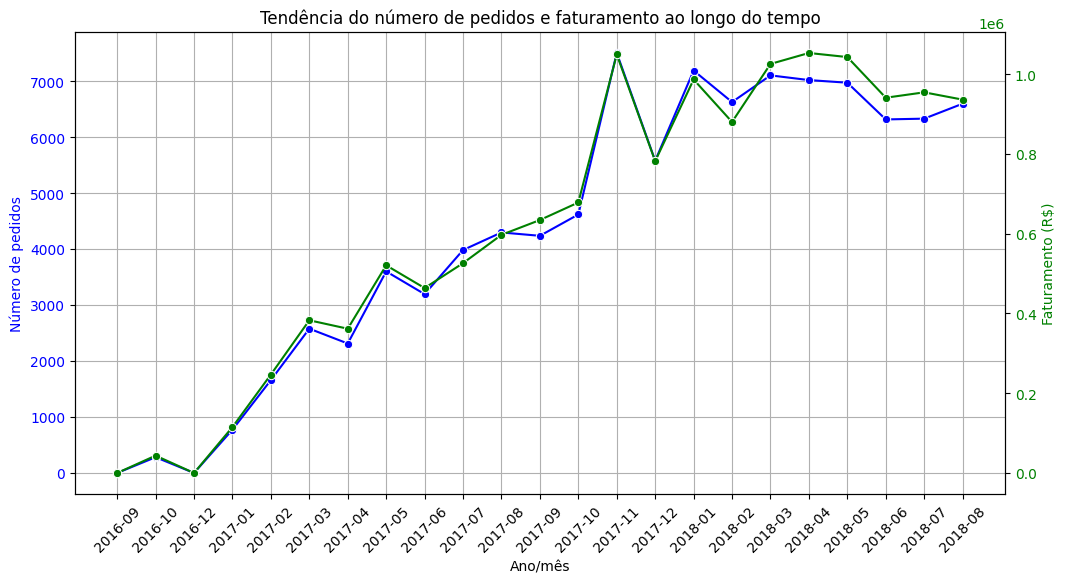

In [123]:
# Criar figura e eixo principal
fig, ax1 = plt.subplots(figsize=(12,6))

# Contar o número de pedidos por mês
pedidos_por_mes = df.groupby("ano_mes")["order_id"].count()

# Criar primeiro gráfico de linha (Número de pedidos)
sns.lineplot(x=pedidos_por_mes.index.astype(str), y=pedidos_por_mes.values, marker="o", color="b", ax=ax1)
ax1.set_xlabel("Ano/mês")
ax1.set_ylabel("Número de pedidos", color="b")
ax1.tick_params(axis='y', labelcolor="b")
ax1.set_title("Tendência do número de pedidos e faturamento ao longo do tempo")
ax1.tick_params(axis='x', rotation=45)
ax1.grid()

# Criar segundo eixo para faturamento
ax2 = ax1.twinx()

# Soma do faturamento por mês
faturamento_por_mes = df.groupby("ano_mes")["valor_total_pedido"].sum()

# Criar segundo gráfico de linha (Faturamento)
sns.lineplot(x=faturamento_por_mes.index.astype(str), y=faturamento_por_mes.values, marker="o", color="g", ax=ax2)
ax2.set_ylabel("Faturamento (R$)", color="g")
ax2.tick_params(axis='y', labelcolor="g")

plt.show()

### 📌 Passo 5.2 – Análise do comportamento de compra

Este gráfico analisa se há dias específicos do mês com mais pedidos, como o início ou fim do mês, o que pode indicar influência de datas salariais ou promoções sazonais.

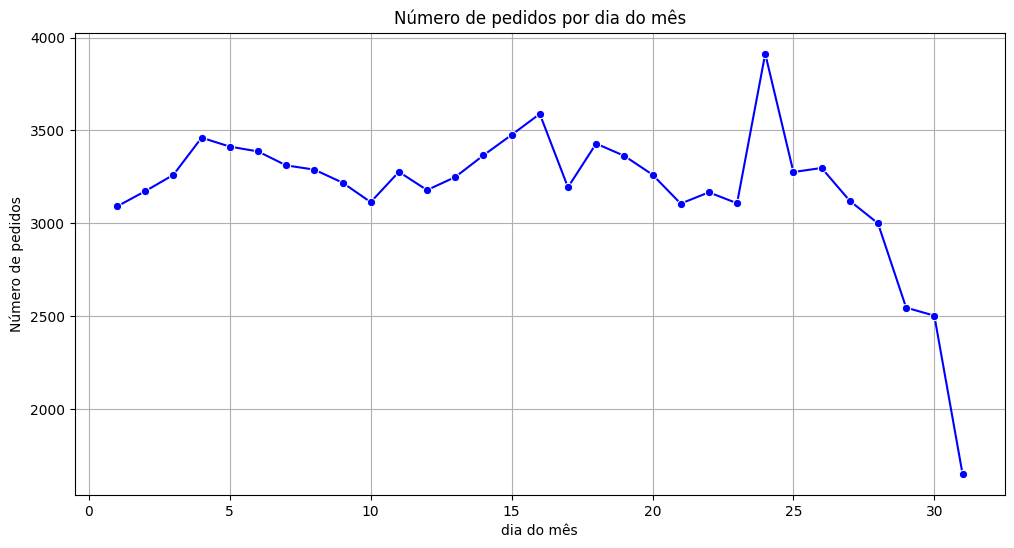

In [124]:
# Contar pedidos por mês
pedidos_por_dia = df.groupby("dia_do_mes")["order_id"].count()

# Criar gráfico de linha
plt.figure(figsize=(12,6))
sns.lineplot(x=pedidos_por_dia.index, y=pedidos_por_dia.values, marker="o", color="blue")
plt.xlabel("dia do mês")
plt.ylabel("Número de pedidos")
plt.title("Número de pedidos por dia do mês")
#plt.xticks(range(1,32))
plt.grid()
plt.show()

Aqui exploramos quais dias da semana possuem maior volume de pedidos, o que pode auxiliar no planejamento de promoções e operações logísticas.

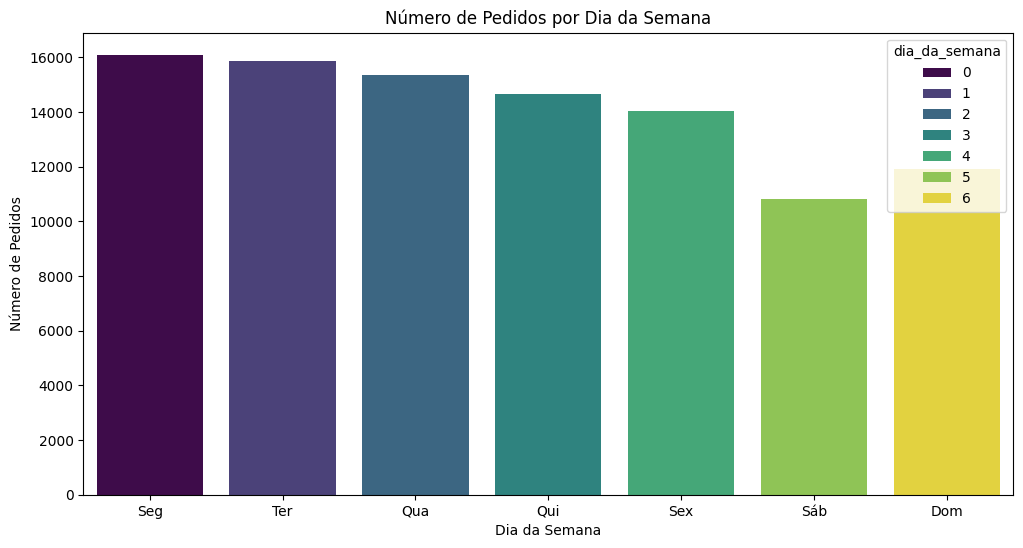

In [125]:
# Contar pedidos por dia da semana
pedidos_por_dia = df.groupby("dia_da_semana")["order_id"].count()

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=pedidos_por_dia.index, y=pedidos_por_dia.values, palette="viridis", hue=pedidos_por_dia.index)
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Pedidos")
plt.title("Número de Pedidos por Dia da Semana")
plt.xticks(range(7), ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"])
plt.show()

Abaixo iremos analisar a relação entre o dia da semana e a hora do dia em que os pedidos foram realizados.

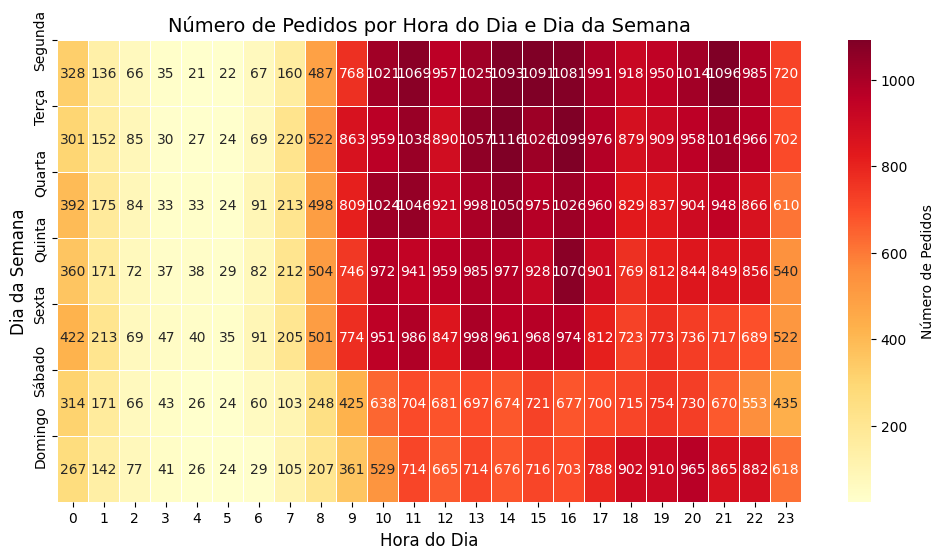

In [126]:
# Contar número de pedidos por hora e dia da semana
pedidos_por_hora_dia = df.groupby(['dia_da_semana', 'hora']).size().unstack()


# Criando a figura com um tamanho maior
plt.figure(figsize=(12, 6))

# Criando o heatmap com uma paleta mais contrastante
sns.heatmap(
    pedidos_por_hora_dia, 
    cmap="YlOrRd",  # Paleta com mais contraste (amarelo -> vermelho)
    linewidths=0.5, 
    annot=True, 
    fmt="d", 
    robust=True,  # Melhora o contraste das cores ignorando outliers extremos
    cbar_kws={'label': 'Número de Pedidos'}  # Nomeia a barra de cores
)

# Ajustando os rótulos
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Dia da Semana", fontsize=12)
plt.title("Número de Pedidos por Hora do Dia e Dia da Semana", fontsize=14)

# Substituindo os números dos dias da semana por nomes
dias_semana = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
plt.yticks(ticks=range(7), labels=dias_semana)  # Ajustando os rótulos do eixo Y

# Exibir o gráfico
plt.show()


### 📌 Passo 5.3 – Distribuição geográfica dos pedidos

O gráfico abaixo mostra os 10 estados com maior número de pedidos.

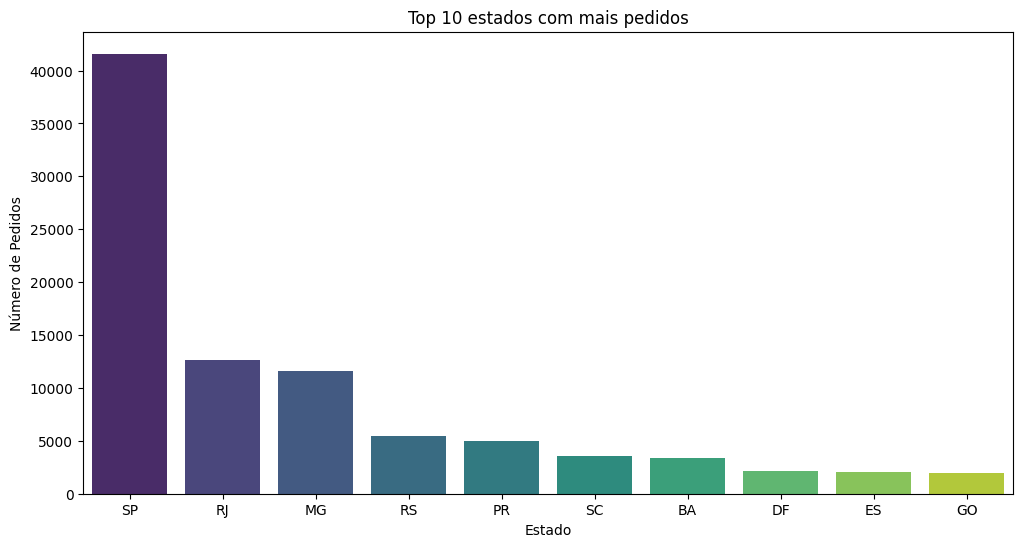

In [127]:
# Contar pedidos por estado
top_estados = df["customer_state"].value_counts().head(10)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=top_estados.index, y=top_estados.values, palette="viridis", hue=top_estados.index)
plt.xlabel("Estado")
plt.ylabel("Número de Pedidos")
plt.title("Top 10 estados com mais pedidos")
plt.show()


No gráfico abaixo estão os 10 estados com maior faturamento bruto.

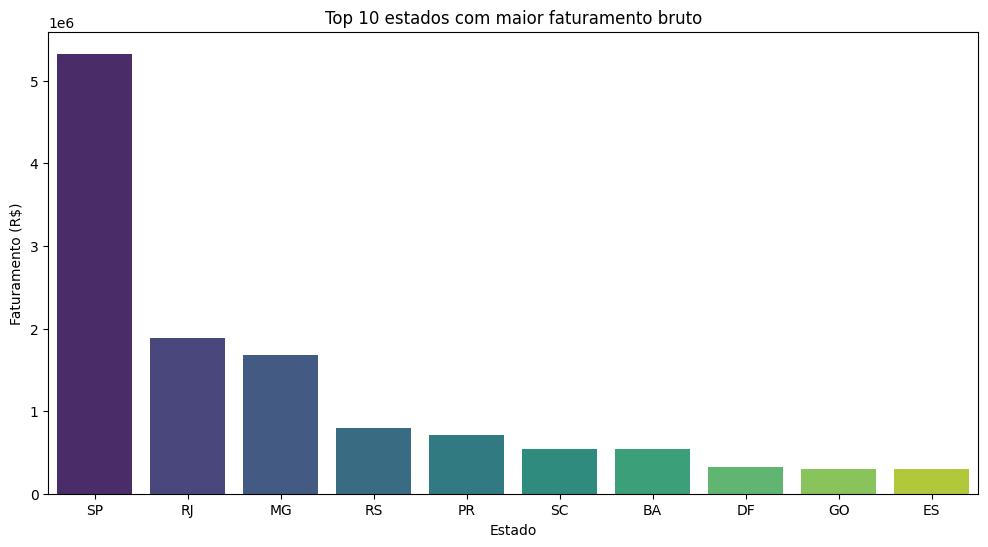

In [128]:
# Calcular faturamento por estado
faturamento_estado = df.groupby("customer_state")["valor_total_pedido"].sum().sort_values(ascending=False).head(10)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=faturamento_estado.index, y=faturamento_estado.values, palette="viridis", hue=faturamento_estado.index)
plt.xlabel("Estado")
plt.ylabel("Faturamento (R$)")
plt.title("Top 10 estados com maior faturamento bruto")
plt.show()

O gráfico abaixo exibe o valor médio gasto por pedido (ticket médio) em cada estado, permitindo identificar regiões onde os clientes fazem compras de maior ou menor valor.

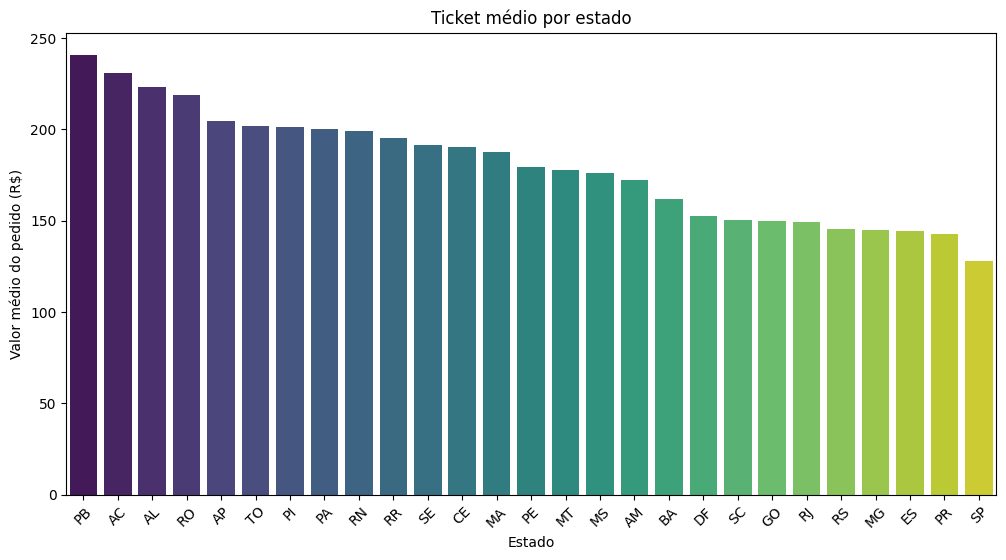

In [129]:
# Calcular ticket médio por estado
ticket_medio_estado = df.groupby("customer_state")["valor_total_pedido"].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=ticket_medio_estado.index, y=ticket_medio_estado.values, palette="viridis", hue=ticket_medio_estado.index)
plt.xlabel("Estado")
plt.ylabel("Valor médio do pedido (R$)")
plt.title("Ticket médio por estado")
plt.xticks(rotation=45)
plt.show()


### 📌 Passo 5.4 – Tempo de entrega e análise dos pedidos com atraso

Inicialmente iremos analisar o tempo médio de entrega dos pedidos por estado.

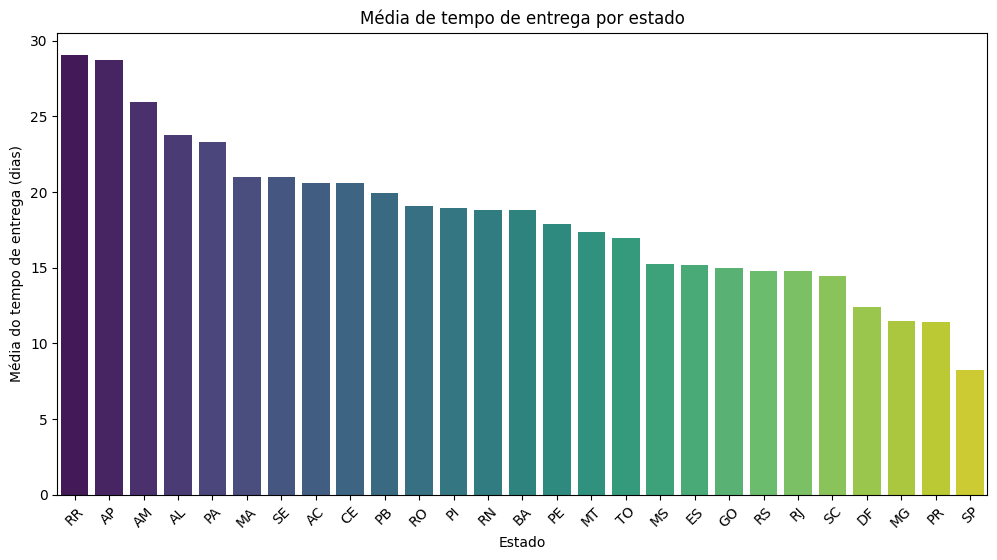

In [130]:
# Calcular a média do tempo de entrega por estado
tempo_entrega_estados = df.groupby("customer_state")["tempo_entrega"].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=tempo_entrega_estados.index, y=tempo_entrega_estados.values, palette="viridis", hue=tempo_entrega_estados.index)

plt.xlabel("Estado")
plt.ylabel("Média do tempo de entrega (dias)")
plt.title("Média de tempo de entrega por estado")
plt.xticks(rotation=45)
plt.show()

Agora vamos analisar quantos pedidos não tiveram atraso e a média dos pedidos que foram entregues com atraso.

In [131]:
# Contar pedidos sem atraso
sem_atraso = df[df["dias_atraso"] == 0].shape[0]

# Contar total de pedidos
total_pedidos = df.shape[0]

# Calcular a porcentagem
percentual_sem_atraso = (sem_atraso / total_pedidos) * 100

print(f"📌 {percentual_sem_atraso:.2f}% dos pedidos foram entregues sem atraso.")


📌 93.35% dos pedidos foram entregues sem atraso.


In [132]:
# Calcular a média de atraso
media_atraso = pedidos_atrasados["dias_atraso"].mean()

print(f"📌 Média de dias de atraso nos pedidos atrasados: {media_atraso:.2f} dias")


📌 Média de dias de atraso nos pedidos atrasados: 10.64 dias


Agora vamos criar um gráfico do atraso médio por estado.

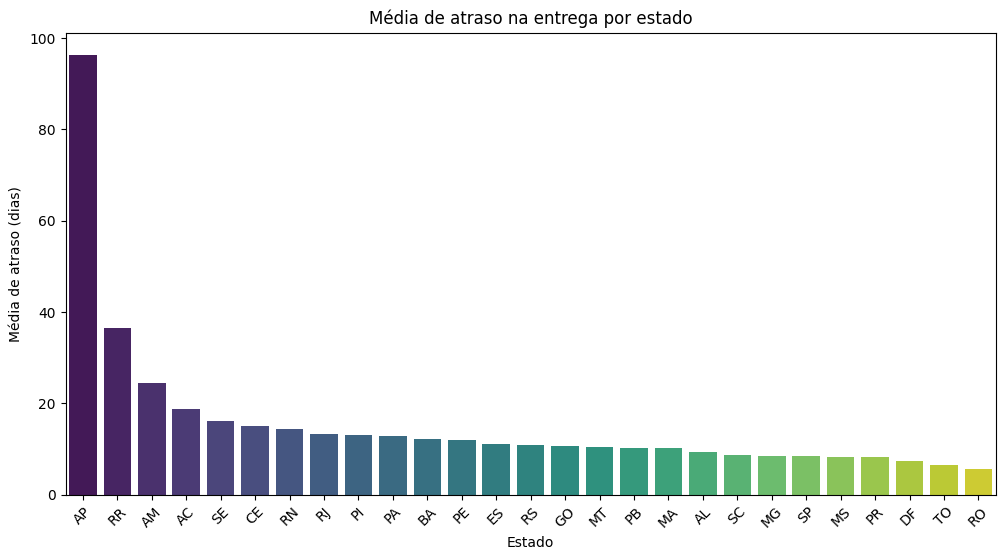

In [133]:
# Calcular a média de atraso por estado
atraso_estados = pedidos_atrasados.groupby("customer_state")["dias_atraso"].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=atraso_estados.index, y=atraso_estados.values, palette="viridis", hue=atraso_estados.index)

plt.xlabel("Estado")
plt.ylabel("Média de atraso (dias)")
plt.title("Média de atraso na entrega por estado")
plt.xticks(rotation=45)
plt.show()


Em seguida, iremos analisar os estados que tiveram o maior número de pedidos atrasados.

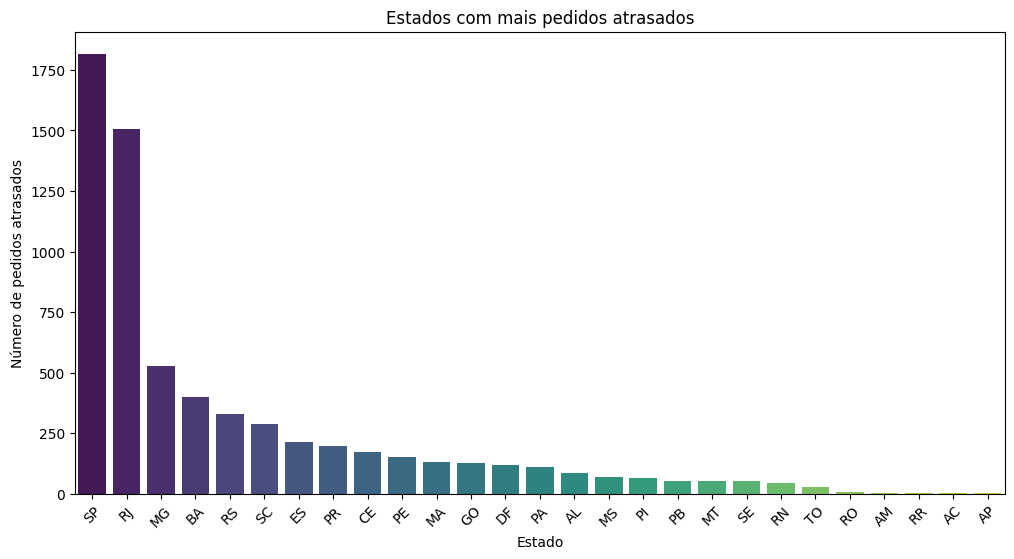

In [134]:
# Contar número de pedidos atrasados por estado
atrasados_por_estado = pedidos_atrasados["customer_state"].value_counts()

# Criar um gráfico de barras mostrando os estados com mais pedidos atrasados
plt.figure(figsize=(12,6))
sns.barplot(x=atrasados_por_estado.index, y=atrasados_por_estado.values, palette="viridis", hue=atrasados_por_estado.index)
plt.xticks(rotation=45)
plt.title("Estados com mais pedidos atrasados")
plt.xlabel("Estado")
plt.ylabel("Número de pedidos atrasados")
plt.show()

### 📌 Passo 5.5 – Valor médio de frete por estado

Agora vamos criar um gráfico do valor médio de frete por estado.

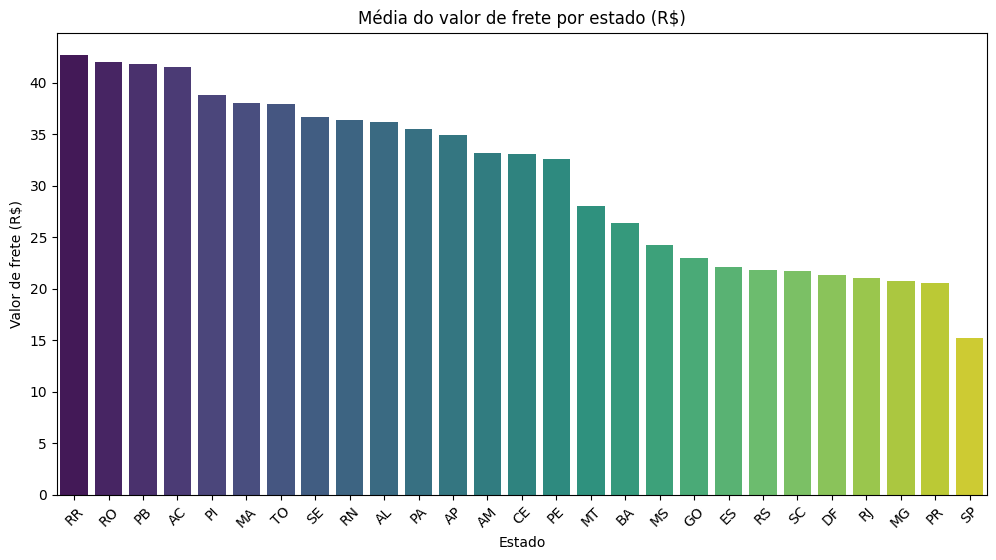

In [135]:
# Calcular a média de frete por estado
frete_estados = df.groupby("customer_state")['freight_value'].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=frete_estados.index, y=frete_estados.values, palette="viridis", hue=frete_estados.index)
plt.xlabel("Estado")
plt.ylabel("Valor de frete (R$)")
plt.title("Média do valor de frete por estado (R$)")
plt.xticks(rotation=45)
plt.show()

### 📌 Passo 5.6 – Análise por categorias de produtos

Vamos contar quantas vezes cada categoria aparece nos pedidos para saber quais são as mais populares.

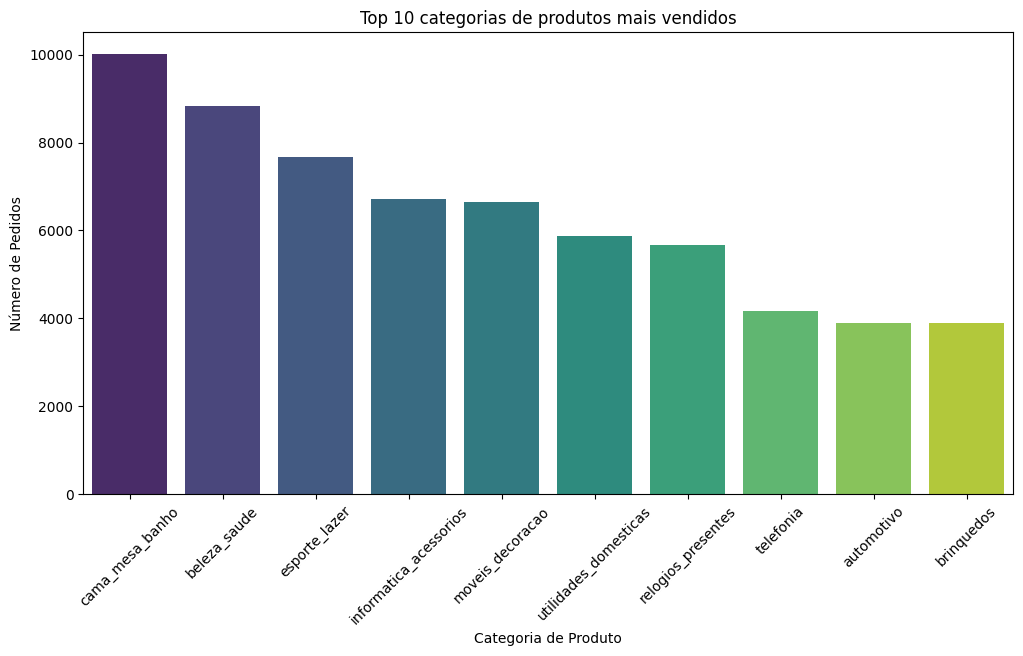

In [136]:
# Contar os produtos vendidos por categoria
top_categorias = df["product_category_name"].value_counts().head(10)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=top_categorias.index, y=top_categorias.values, palette="viridis", hue=top_categorias.index)
plt.xlabel("Categoria de Produto")
plt.ylabel("Número de Pedidos")
plt.title("Top 10 categorias de produtos mais vendidos")
plt.xticks(rotation=45)
plt.show()


Agora, vamos somar o valor total das vendas por categoria para ver quais trazem mais faturamento para o e-commerce.

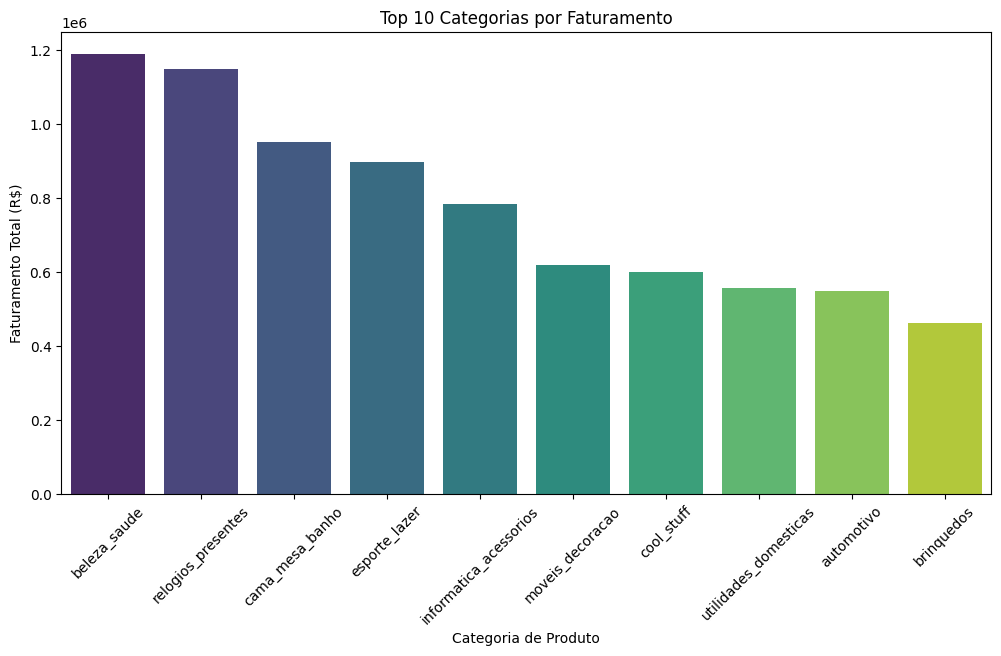

In [137]:
# Calcular o faturamento total por categoria
faturamento_categorias = df.groupby("product_category_name")["price"].sum().sort_values(ascending=False).head(10)

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=faturamento_categorias.index, y=faturamento_categorias.values, palette="viridis", hue=faturamento_categorias.index)
plt.xlabel("Categoria de Produto")
plt.ylabel("Faturamento Total (R$)")
plt.title("Top 10 Categorias por Faturamento")
plt.xticks(rotation=45)
plt.show()


No gráfico abaixo iremos analisar o ticket médio nas principais categorias de faturamento, ajudando a entender quais produtos têm maior valor agregado por venda.

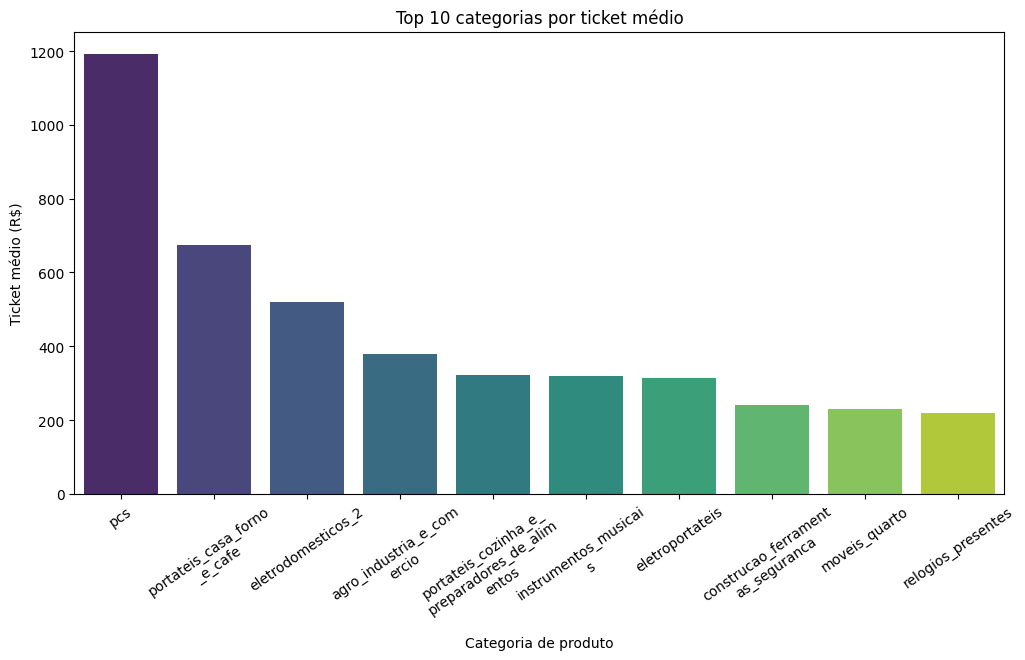

In [138]:
# Calcular o ticket médio por categoria
ticket_categorias = df.groupby("product_category_name")["valor_total_pedido"].mean().sort_values(ascending=False).head(10)

# Criar uma função para quebrar os textos longos. Isso vai facilitar ler as categorias no gráfico.
def quebra_texto(texto, n=20):
    return "\n".join([texto[i:i+n] for i in range(0, len(texto), n)])

# Aplicar a função nos rótulos
categorias_quebradas = [quebra_texto(cat) for cat in ticket_categorias.index]

# Criar gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_quebradas, y=ticket_categorias.values, palette="viridis", hue=categorias_quebradas)
plt.xlabel("Categoria de produto")
plt.ylabel("Ticket médio (R$)")
plt.title("Top 10 categorias por ticket médio")
plt.xticks(rotation=35)
plt.show()

Agora, vamos calcular a média do frete para cada categoria e ver quais produtos têm frete mais caro.

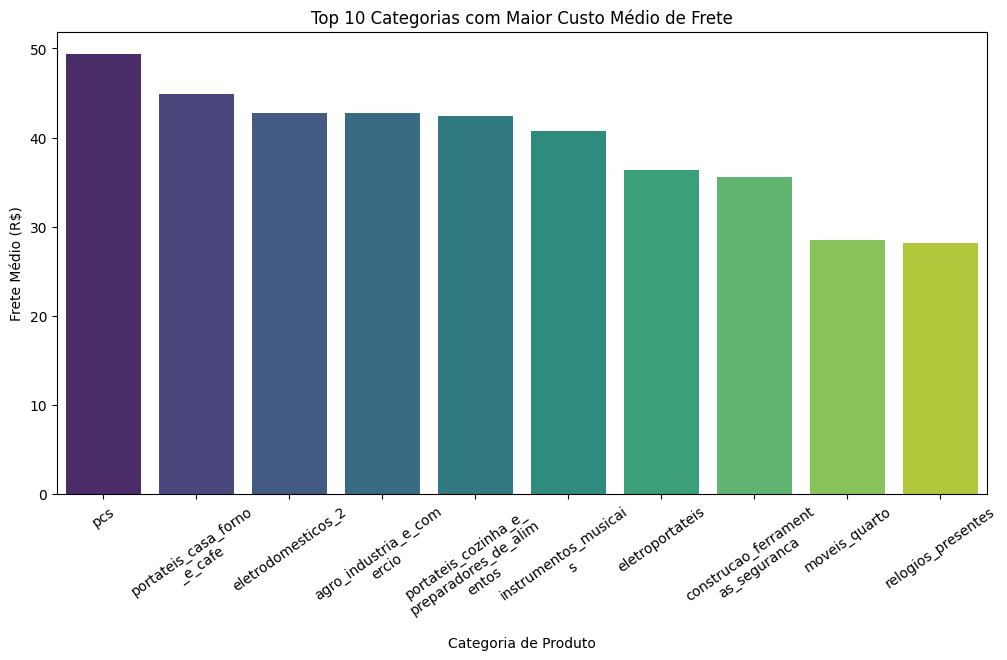

In [139]:
# Calcular o frete médio por categoria
frete_categorias = df.groupby("product_category_name")["freight_value"].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(x=categorias_quebradas, y=frete_categorias.values, palette="viridis", hue=categorias_quebradas)
plt.xlabel("Categoria de Produto")
plt.ylabel("Frete Médio (R$)")
plt.title("Top 10 Categorias com Maior Custo Médio de Frete")
plt.xticks(rotation=35)
plt.show()

## **Parte final: conclusão e insights gerais**

### 📌 Principais Descobertas do Projeto

* **Estado com mais pedidos:** São Paulo
* **Estados com mais atraso na entrega:** Roraima, Amapá e Sergipe
* **Tempo médio de entrega:** 12 dias
* **Tempo médio de atraso:** 10 dias
* **Categoria mais vendida:** cama, mesa e banho
* **Categoria que mais gera receita:** beleza e saúde
* **Categorias com maior ticket médio:** PCs
* **Categorias com frete mais caro:** PCs

### 📌 Crescimento e sazonalidade

#### Tendência de crescimento
* O número de pedidos apresentou **crescimento ao longo do tempo**, indicando que o mercado está em expansão e tem potencial de crescimento futuro.

#### Impacto de datas especiais
* **Black Friday** teve um grande impacto, com um pico de vendas no mês de **novembro de 2017**.
* O **dia 24 de novembro de 2017** foi o dia com maior volume de pedidos, coincidindo com a Black Friday.

#### Padrão de compras por dia do mês
* O **número de pedidos cai no final do mês**.
* Pequenos aumentos ocorrem próximo aos dias **5 e 15**, possivelmente ligados ao recebimento de salários.

#### Padrão de compras por dia da semana e hora do dia
* O número de pedidos é **mais alto na segunda-feira** e vai diminuindo ao longo da semana.
* O **horário de maior movimento é das 9h às 17h, de segunda a sexta-feira**.

**💡 Sugestões:**
* Criar estratégias promocionais **no final do mês** para estimular compras.
* Focar em campanhas de marketing e descontos durante **a Black Friday** para maximizar as vendas.
* Estimular compras no **fim de semana**, quando o volume de pedidos é menor.

### 📌 Distribuição geográfica dos pedidos

* Os estados do **Sul e Sudeste** concentram a maior parte dos pedidos e faturamento.
* **São Paulo, Rio de Janeiro e Minas Gerais** lideram em número de pedidos e receita.

#### Ticket médio por estado
* **Paraíba, Acre e Alagoas** apresentaram os maiores tickets médios.
  * Possível explicação: nesses estados, os clientes preferem fazer compras de maior valor para compensar o alto custo do frete.
* **São Paulo teve o menor ticket médio**, o que pode indicar um volume maior de compras de produtos baratos ou melhor logística de frete.

**💡 Sugestões:**
* Personalizar campanhas para estados com maior ticket médio, focando em produtos de alto valor agregado.
* Monitorar a elasticidade do frete em relação à decisão de compra para diferentes regiões.

### 📌 Tempo de entrega e atrasos

#### Tempo médio de entrega
* Estados com maior tempo de entrega: **Roraima, Amapá, Amazonas, Alagoas e Pará**.

#### Pedidos atrasados
* **93% dos pedidos foram entregues sem atraso**.
* Entre os pedidos atrasados:
  * **Média de 10 dias de atraso**.
  * **Estados com os maiores atrasos:**
    * **Amapá: 96 dias**
    * **Roraima: 36 dias**
    * **Amazonas: 24 dias**
    * **Acre: 18 dias**
  * Apesar do alto tempo de atraso, esses estados tiveram **menos de 5 pedidos atrasados cada**.
* **Estados com maior número de pedidos atrasados:** **São Paulo e Rio de Janeiro**.

**💡 Sugestões:**
* Melhorar a previsão de entrega para estados do Norte.
* Otimizar a logística para **diminuir atrasos em São Paulo e Rio de Janeiro**, onde o volume de pedidos é maior.

### 📌 Valor médio do frete por estado

* **As regiões Norte e Nordeste têm o frete mais caro**.
* Regiões com frete mais caro também têm maior incidência de atrasos.
* Provável impacto: **menor volume de pedidos nessas regiões devido ao alto custo do frete**.

**💡 Sugestões:**
* Oferecer **frete grátis acima de um valor mínimo** para incentivar compras nessas regiões.
* Negociar com transportadoras para reduzir custos logísticos.

### 📌 Análise por categorias de produto

#### Categorias mais vendidas
* **Cama, Mesa e Banho**, **Beleza e Saúde**, **Esporte e Lazer**.

#### Categorias com maior faturamento
* **Beleza e Saúde**, **Relógios e Presentes**, **Cama, Mesa e Banho**.

#### Ticket médio e frete por categoria
* **Top 3 categorias com maior ticket médio e frete:**
  * **PCs**
  * **Portáteis para Casa, Fornos e Cafeteiras**
  * **Eletrodomésticos**

**💡 Sugestões:**
* Oferecer pacotes promocionais em categorias populares.
* Criar estratégias para **reduzir o custo do frete** em categorias caras.

### 📈 Recomendações gerais

* **Marketing:** segmentar campanhas com base no comportamento de compra de cada estado.
* **Logística:** otimizar a entrega em estados com alto tempo de atraso e pedidos atrasados.
* **Frete:** oferecer opções de frete mais competitivas para o Norte e Nordeste.
* **Ofertas:** criar promoções em datas estratégicas para incentivar compras no fim do mês e fim de semana.
* **Expansão do projeto:** criar um dashboard interativo para monitoramento contínuo dos dados.

---

Com essas análises, é possível otimizar as estratégias do e-commerce, melhorar a experiência do cliente e aumentar as vendas! 🚀